<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning
from pandas_profiling import ProfileReport

# Statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.dummy import DummyRegressor

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [2]:
# Read data 
df = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

In [3]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [4]:
# Check NaN
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [5]:
# Check the dtypes
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [6]:
# Check Overall
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
# Check out the summary statistics
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


sq__ft , price and latitude columns should not have negative number.

https://www.techtarget.com/whatis/definition/latitude-and-longitude(latitude must not be more 90)

In [8]:
# Check row have invalid value
df[df["sq__ft"] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [9]:
# Decide delete row "sq__ft" < 0 because only one row 
df = df[~df["sq__ft"] < 0] 

In [10]:
# Recheck (985-1= 984 row)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     984 non-null    object 
 1   city       984 non-null    object 
 2   zip        984 non-null    int64  
 3   state      984 non-null    object 
 4   beds       984 non-null    int64  
 5   baths      984 non-null    int64  
 6   sq__ft     984 non-null    int64  
 7   type       984 non-null    object 
 8   sale_date  984 non-null    object 
 9   price      984 non-null    int64  
 10  latitude   984 non-null    float64
 11  longitude  984 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 99.9+ KB


In [11]:
# Check duplicated rows
df[df.duplicated(keep=False)] 

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
341,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
403,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [12]:
# Decide delete same row and keep only one row  
df = df[~df.duplicated()] 

In [13]:
# Recheck (984-3= 981 row)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     981 non-null    object 
 1   city       981 non-null    object 
 2   zip        981 non-null    int64  
 3   state      981 non-null    object 
 4   beds       981 non-null    int64  
 5   baths      981 non-null    int64  
 6   sq__ft     981 non-null    int64  
 7   type       981 non-null    object 
 8   sale_date  981 non-null    object 
 9   price      981 non-null    int64  
 10  latitude   981 non-null    float64
 11  longitude  981 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 99.6+ KB


In [14]:
# Recheck out the summary statistics
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,95750.777778,2.916412,1.779817,1317.120285,234639.109072,38.607346,-121.355862
std,85.114566,1.305071,0.894678,853.547500,138333.292994,0.145387,0.138418
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,956.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1305.000000,215000.000000,38.625932,-121.376220
75%,95828.000000,4.000000,2.000000,1720.000000,300000.000000,38.694559,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


we have some values that seem out of place being that there are houses with 0 bedrooms,  0 baths and 0 sqr(ft).

In [15]:
# Find row 
df[((df["beds"]==0) & (df["baths"]==0) & (df["sq__ft"]==0))]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [16]:
# Decide delete row 3 columns which have 0 value () 
# Whats the price that have 0 bedrooms/0 bathrooms and 0 sq(ft)?
df = df[~((df["beds"]==0) & (df["baths"]==0) & (df["sq__ft"]==0))]

In [17]:
# Recheck (981-107 = 874 row)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     874 non-null    object 
 1   city       874 non-null    object 
 2   zip        874 non-null    int64  
 3   state      874 non-null    object 
 4   beds       874 non-null    int64  
 5   baths      874 non-null    int64  
 6   sq__ft     874 non-null    int64  
 7   type       874 non-null    object 
 8   sale_date  874 non-null    object 
 9   price      874 non-null    int64  
 10  latitude   874 non-null    float64
 11  longitude  874 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 88.8+ KB


In [18]:
# After scatter plot can see outliner in sq__ft columns 
# Should not be 0 value because that affect SLR model
df[df["sq__ft"] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378
155,4070 REDONDO DR,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,606238,38.666807,-121.064830
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580
223,2778 KAWEAH CT,CAMERON PARK,95682,CA,3,1,0,Residential,Tue May 20 00:00:00 EDT 2008,201000,38.694052,-120.995589
...,...,...,...,...,...,...,...,...,...,...,...,...
863,2982 ABERDEEN LN,EL DORADO HILLS,95762,CA,4,3,0,Residential,Fri May 16 00:00:00 EDT 2008,879000,38.706692,-121.058869
865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742
922,10001 WOODCREEK OAKS BLVD Unit 815,ROSEVILLE,95747,CA,2,2,0,Condo,Thu May 15 00:00:00 EDT 2008,170000,38.795529,-121.328819
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025


In [19]:
# Decide delete for increase relationship with model 
df.drop(df[df['sq__ft'] == 0 ].index, inplace = True)

In [20]:
# After scatter plot can see outliner in price columns 
# Should not be 2000 but have more beds,bath and sq_ft
df[df["price"] <= 2000]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337


In [21]:
# Decide delete for increase relationship with model 
df.drop(df[df["price"] <= 2000].index, inplace = True)

In [22]:
# Recheck (874-1-62 = 810 row)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     810 non-null    object 
 1   city       810 non-null    object 
 2   zip        810 non-null    int64  
 3   state      810 non-null    object 
 4   beds       810 non-null    int64  
 5   baths      810 non-null    int64  
 6   sq__ft     810 non-null    int64  
 7   type       810 non-null    object 
 8   sale_date  810 non-null    object 
 9   price      810 non-null    int64  
 10  latitude   810 non-null    float64
 11  longitude  810 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.3+ KB


In [23]:
# Recheck out the summary statistics
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,95761.598765,3.248148,1.960494,1587.991358,230028.069136,38.576913,-121.378851
std,85.303433,0.848996,0.665906,647.645647,119697.367127,0.126448,0.119571
min,95603.000000,1.000000,1.000000,484.000000,30000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1144.500000,148812.500000,38.473785,-121.451501
50%,95820.000000,3.000000,2.000000,1419.500000,208000.000000,38.591720,-121.405456
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.674704,-121.326348
max,95864.000000,8.000000,5.000000,4400.000000,884790.000000,39.008159,-120.597599


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [24]:
# Save cleaning dataframe 
df.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [25]:
# Read cleaning dataframe 
train = pd.read_csv('./datasets/sacramento_cleaned_dataframe.csv')

In [26]:
# Check correlation in each columns  
train.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,-0.067800,-0.098137,-0.096216,-0.222935,-0.133781,-0.561458
beds,-0.067800,1.000000,0.657982,0.716979,0.443219,-0.107879,0.052791
baths,-0.098137,0.657982,1.000000,0.722341,0.512347,-0.078771,0.098522
sq__ft,-0.096216,0.716979,0.722341,1.000000,0.728268,-0.099697,0.121558
price,-0.222935,0.443219,0.512347,0.728268,1.000000,0.057508,0.284505
latitude,-0.133781,-0.107879,-0.078771,-0.099697,0.057508,1.000000,0.347813
longitude,-0.561458,0.052791,0.098522,0.121558,0.284505,0.347813,1.000000


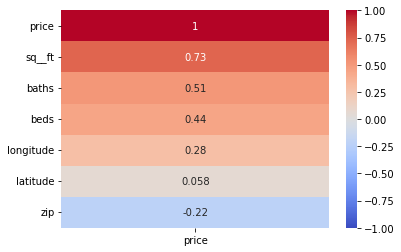

In [27]:
# Create heatmap
sns.heatmap(train.corr()[["price"]].sort_values(by="price", 
            ascending=False), cmap="coolwarm", vmax=1, vmin = -1,annot=True)
plt.yticks(rotation=0);

sqft, baths, and beds are good predictors of price

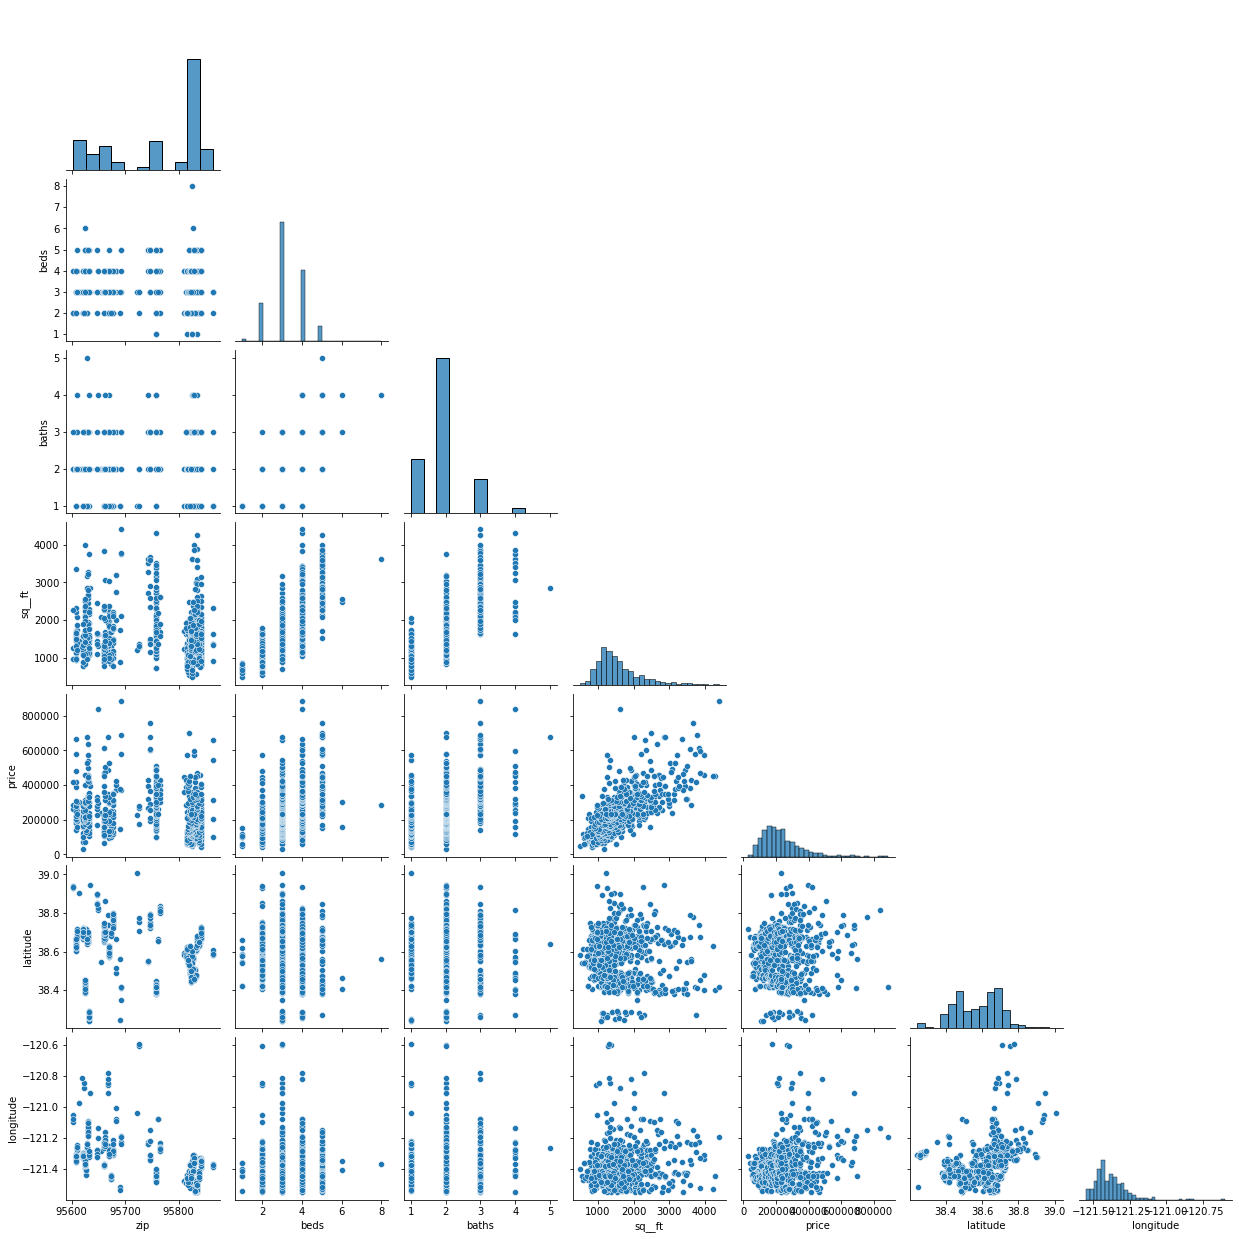

In [28]:
# Create pairplot
sns.pairplot(train, corner=True);

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

sqft has the highest correlation to price (0.69) and look like linear relationship(pairplot),
so it is likely the best predictor of price.

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [29]:
# train[train["price"]<=10000] It's outliner. decided to drop(back cleaning step) 

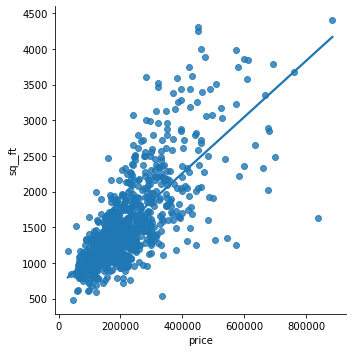

In [30]:
sns.lmplot(x="price",y="sq__ft", data=train, ci=False);

In [31]:
# Select the features sq__ft for predicting y assign them to X
X_sqft = train[['sq__ft']]

In [32]:
# Recheck dimension 
X_sqft.shape

(810, 1)

In [33]:
# Select the target variable and assign that series to y
y = train["price"]

In [34]:
# Recheck dimension 
y.shape

(810,)

### 6. Interpret the intercept and the slope.

In [36]:
lrsqft = LinearRegression() 
lrsqft.fit(X_sqft,y)
print(f"Slope of sq(ft) : {lrsqft.coef_[0]}")
print(f"Intercept of sq(ft) : {lrsqft.intercept_}") 

Slope of sq(ft) : 134.59798235895542
Intercept of sq(ft) : 16287.636342221405


In [38]:
# Check how much our new feature moves the $R^2$ score
cross_val_score(lrsqft, X_sqft, y).mean()

0.47603182855993664

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [39]:
y_preds_sqft = lrsqft.predict(X_sqft)

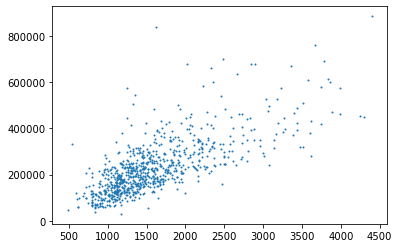

In [40]:
# L: Relationship between sq_ft and price look like linear 
plt.scatter(X_sqft["sq__ft"],y,s=1)

In [41]:
# I: We observations is in pairplot that is not affect one another

In [42]:
# N: NO! (Right skew) 
# residuals = y-y_preds_sqft
# plt.hist(resids, bins=50);

In [47]:
residuals = y - y_preds_sqft
residuals[:5]

0    -69589.549594
1   -105151.481755
2    -54547.630300
3    -61658.117312
4    -41662.228282
Name: price, dtype: float64

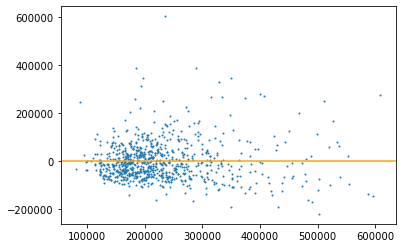

In [48]:
# E: Rather homoscedasticity
plt.scatter(y_preds_sqft,residuals,s=1)
plt.axhline(0, color="orange");

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [49]:
print(f'R^2: {lrsqft.score(X_sqft, y)}')
print(f'MAE: {metrics.mean_absolute_error(y, y_preds_sqft)}')
print(f'MSE: {metrics.mean_squared_error(y,y_preds_sqft)}')
print(f'RMSE: {metrics.mean_squared_error(y, y_preds_sqft, squared=False)}')

R^2: 0.530374707800233
MAE: 59340.688772877445
MSE: 6720230610.415381
RMSE: 81977.01269511705


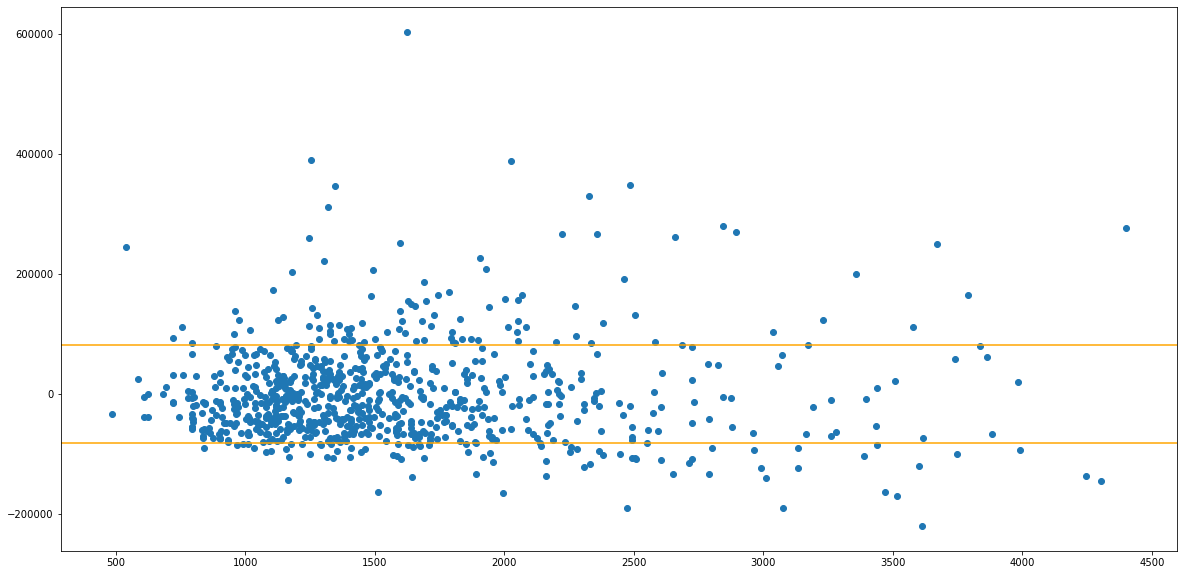

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(X_sqft["sq__ft"], residuals)
plt.axhline(np.std(residuals), color = "orange") #+1SD
plt.axhline((np.std(residuals))*-1, color = "orange"); #-1SD

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [116]:
train['latitude'].value_counts()

38.423251    4
38.710221    2
38.658812    2
38.734136    2
38.646677    2
            ..
38.271646    1
38.512602    1
38.582604    1
38.676306    1
38.655245    1
Name: latitude, Length: 802, dtype: int64

In [104]:
# ['city','zip','state','beds','baths','sq__ft','type','sale_date','price','latitude','longitude']
x_vars = ['city','beds','baths','sq__ft','type']
X = train[x_vars]
X = pd.get_dummies(columns= ["city","type"], data = X)

In [105]:
X.shape

(810, 41)

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [106]:
X.head()

,beds,baths,sq__ft,city_ANTELOPE,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,city_CITRUS HEIGHTS,city_COOL,city_DIAMOND SPRINGS,...,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_Condo,type_Multi-Family,type_Residential
0,2,1,836,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3,1,1167,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,1,796,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2,1,852,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2,1,797,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [107]:
y = train["price"]

In [108]:
lr = LinearRegression() 
lr.fit(X,y)

LinearRegression()

In [109]:
print(f"Slope of MLR model : {lr.coef_}")
print(f"Intercept of MLR model : {lr.intercept_}") 
print(f"R-squared Score of MLR model: {lr.score(X,y)}") 

Slope of MLR model : [-2.10638686e+04  3.81023179e+03  1.34721110e+02 -7.40779137e+04
  5.73995584e+04  4.38906097e+04  1.12604520e+04 -6.36765510e+04
  2.01997100e+04 -4.26160757e+04 -2.45869697e+04 -1.11622667e+04
 -6.54777324e+04 -1.12635924e+05  1.34338310e+03  4.82081567e+04
 -6.31145487e+04  2.19495067e+02  2.25857336e+05 -7.19279115e+04
 -3.41443231e+04  3.01893646e+05 -1.27682916e+05 -1.35222707e+04
 -1.00190485e+05 -1.86271563e+04  2.45344502e+05  9.49222580e+04
 -2.78698124e+04 -7.90035806e+04 -6.57815286e+04 -6.30053094e+04
  8.61476166e+03 -1.84837632e+04 -7.63045133e+04  6.76352422e+04
 -7.28587309e+04  9.99611718e+04 -1.55012092e+04 -1.36506644e+04
  2.91518737e+04]
Intercept of MLR model : 109930.90167547218
R-squared Score of MLR model: 0.6752290996274868


### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

In [110]:
y_preds = lr.predict(X)

In [111]:
residuals = y - y_preds

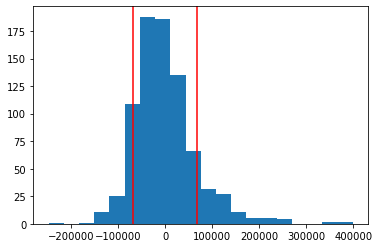

In [112]:
plt.hist(residuals, bins=20)
plt.axvline(np.std(residuals), color = "r")
plt.axvline(np.std(residuals)*-1, color = "r");

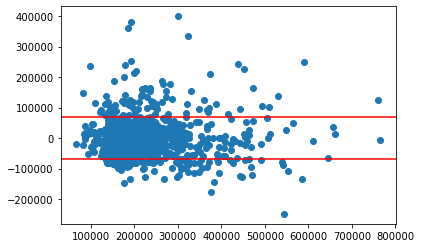

In [113]:
plt.scatter(y_preds,residuals)
plt.axhline(np.std(residuals), color = "r")
plt.axhline(np.std(residuals)*-1, color = "r");

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

1. Linear relationship: There exists a linear relationship between each predictor variable and the response variable.

2. No Multicollinearity: None of the predictor variables are highly correlated with each other.

3. Independence: The observations are independent.

4. Homoscedasticity: The residuals have constant variance at every point in the linear model.

5. Multivariate Normality: The residuals of the model are normally distributed.

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

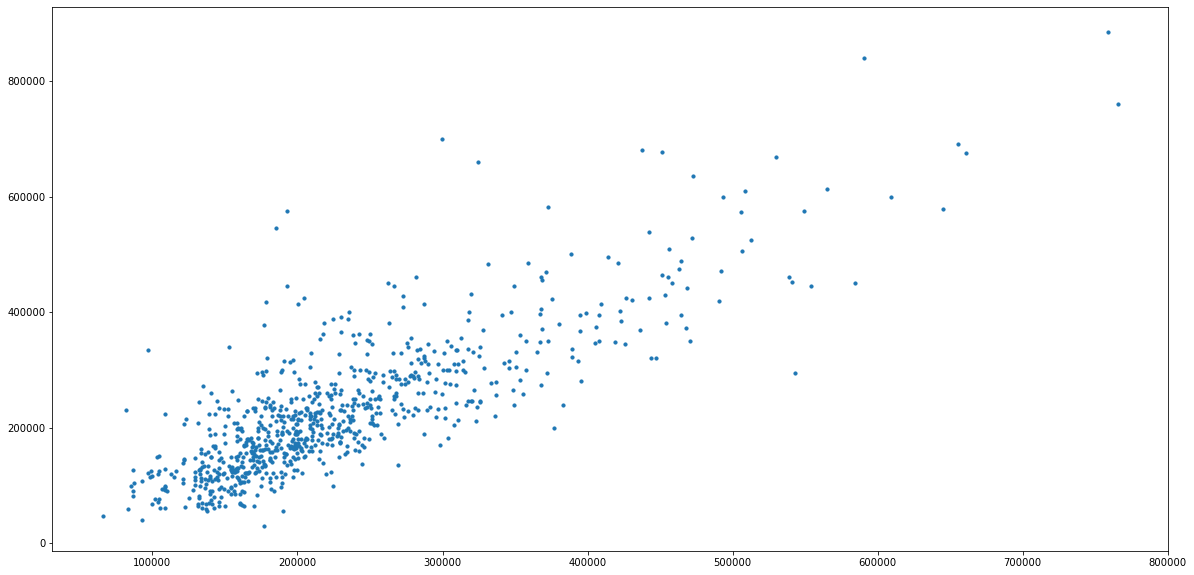

In [114]:
# L: Relationship between sq_ft and price very look like linear(MLR Model)
plt.figure(figsize=(20,10))
plt.scatter(y_preds,y,s=10);

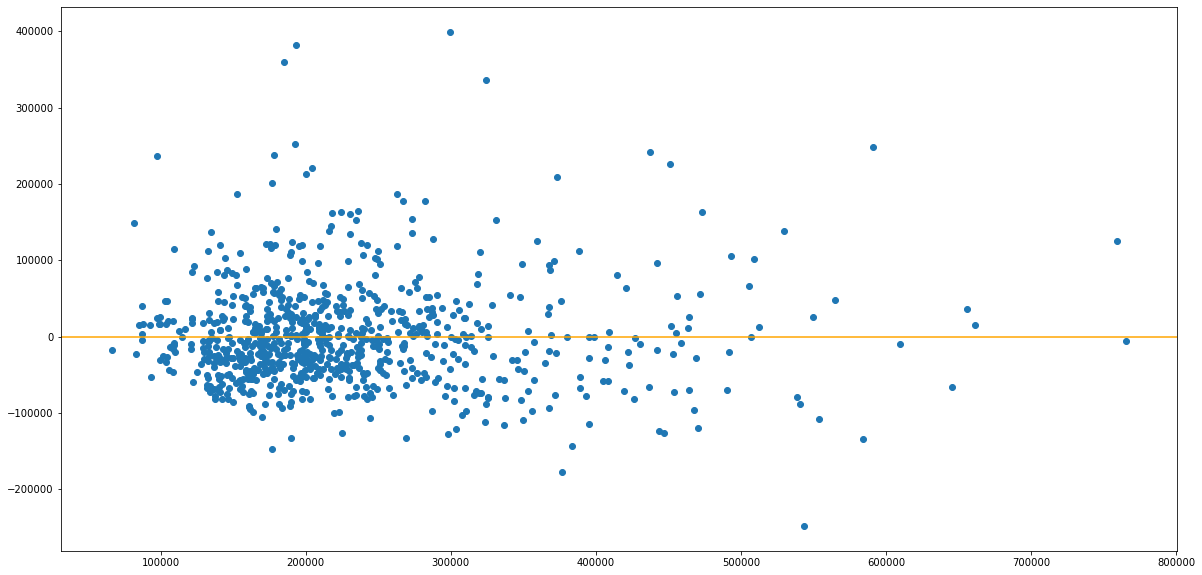

In [69]:
# Homoscedasticity: The residuals have constant variance at every point in the linear model.
plt.figure(figsize=(20,10))
plt.scatter(y_preds,residuals)
plt.axhline(0, color="orange");

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [87]:
import statsmodels.api as sm

In [88]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     41.05
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          2.51e-160
Time:                        15:49:46   Log-Likelihood:                -10164.
No. Observations:                 810   AIC:                         2.041e+04
Df Residuals:                     770   BIC:                         2.060e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.072e+04   1.13e+04      7.118      0.000    5.85e+04    1.03e+05
beds                 -2.106e+04   4705.989     -4.476      0.000   -3.03e+04   -1.18e+04
baths                 3810.2318   5884.532      0.647      0.518   -7741.396    1.54e+04
sq__ft                 134.7211      6.964     19.346      0.000     121.051     148.392
city_ANTELOPE        -7.177e+04    1.4e+04     -5.132      0.000   -9.92e+04   -4.43e+04
city_AUBURN           5.971e+04   4.06e+04      1.469      0.142   -2.01e+04    1.39e+05
city_CAMERON PARK      4.62e+04   6.84e+04      0.676      0.499    -8.8e+04     1.8e+05
city_CARMICHAEL       1.357e+04   1.69e+04      0.802      0.423   -1.96e+04    4.68e+04
city_CITRUS HEIGHTS  -6.137e+04    1.4e+04     -4.376      0.000   -8.89e+04   -3.38e+04
city_COOL             2.251e+04   6.84e+04      0.329      0.742   -1.12e+05    1.57e+05
city_DIAMOND SPRINGS -4.031e+04   6.84e+04     -0.589      0.556   -1.75e+05    9.39e+04
city_EL DORADO       -2.228e+04   4.86e+04     -0.458      0.647   -1.18e+05    7.32e+04
city_EL DORADO HILLS -8856.0240   3.99e+04     -0.222      0.825   -8.73e+04    6.96e+04
city_ELK GROVE       -6.317e+04   9953.456     -6.347      0.000   -8.27e+04   -4.36e+04
city_ELVERTA         -1.103e+05   3.49e+04     -3.158      0.002   -1.79e+05   -4.18e+04
city_FAIR OAKS        3649.6258   2.38e+04      0.153      0.878   -4.31e+04    5.04e+04
city_FOLSOM           5.051e+04   1.91e+04      2.641      0.008     1.3e+04    8.81e+04
city_GALT            -6.081e+04    1.7e+04     -3.583      0.000   -9.41e+04   -2.75e+04
city_GOLD RIVER       2525.7378   4.01e+04      0.063      0.950   -7.61e+04    8.11e+04
city_GRANITE BAY      2.282e+05   4.03e+04      5.661      0.000    1.49e+05    3.07e+05
city_GREENWOOD       -6.962e+04   6.88e+04     -1.012      0.312   -2.05e+05    6.55e+04
city_LINCOLN         -3.184e+04   2.87e+04     -1.108      0.268   -8.82e+04    2.46e+04
city_LOOMIS           3.042e+05   4.92e+04      6.181      0.000    2.08e+05    4.01e+05
city_MATHER          -1.254e+05   6.84e+04     -1.833      0.067    -2.6e+05    8877.457
city_MEADOW VISTA    -1.122e+04   6.85e+04     -0.164      0.870   -1.46e+05    1.23e+05
city_NORTH HIGHLANDS -9.788e+04   1.68e+04     -5.821      0.000   -1.31e+05   -6.49e+04
city_ORANGEVALE      -1.632e+04   2.18e+04     -0.749      0.454   -5.91e+04    2.64e+04
city_PENRYN           2.477e+05   6.84e+04      3.622      0.000    1.13e+05    3.82e+05
city_PLACERVILLE      9.723e+04   3.13e+04      3.108      0.002    3.58e+04    1.59e+05
city_POLLOCK PINES   -2.556e+04   3.99e+04     -0.640      0.522   -1.04e+05    5.28e+04
city_RANCHO CORDOVA   -7.67e+04   1.66e+04     -4.619      0.000   -1.09e+05   -4.41e+04
city_RANCHO MURIETA  -6.348e+04   4.89e+04     -1.297    

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [90]:
adj_r2 = 1 - (1-metrics.r2_score(y,y_preds))*(len(y)-1)/(len(y)-3-1)
adj_r2

0.6740202749362739

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [74]:
# MSE
metrics.mean_squared_error(y,y_preds) 

4647397366.168964

In [75]:
#RSME
metrics.mean_squared_error(y,y_preds,squared=False)

68171.82237676329

In [76]:
#
metrics.r2_score(y,y_preds)

0.6752290996274868

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [77]:
x_vars1 = ['city','beds','baths','sq__ft','type','sale_date']
X1 = train[x_vars1]
# add sale_date 
X1 = pd.get_dummies(columns= ["city","type","sale_date"], data = X1)
X.shape

(810, 42)

In [78]:
X1.head()

,beds,baths,sq__ft,city_ANTELOPE,city_AUBURN,city_CAMERON PARK,city_CARMICHAEL,city_CITRUS HEIGHTS,city_COOL,city_DIAMOND SPRINGS,...,city_WEST SACRAMENTO,city_WILTON,type_Condo,type_Multi-Family,type_Residential,sale_date_Fri May 16 00:00:00 EDT 2008,sale_date_Mon May 19 00:00:00 EDT 2008,sale_date_Thu May 15 00:00:00 EDT 2008,sale_date_Tue May 20 00:00:00 EDT 2008,sale_date_Wed May 21 00:00:00 EDT 2008
0,2,1,836,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3,1,1167,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,1,796,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2,1,852,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2,1,797,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [79]:
X1.columns

Index(['beds', 'baths', 'sq__ft', 'city_ANTELOPE', 'city_AUBURN',
       'city_CAMERON PARK', 'city_CARMICHAEL', 'city_CITRUS HEIGHTS',
       'city_COOL', 'city_DIAMOND SPRINGS', 'city_EL DORADO',
       'city_EL DORADO HILLS', 'city_ELK GROVE', 'city_ELVERTA',
       'city_FAIR OAKS', 'city_FOLSOM', 'city_GALT', 'city_GOLD RIVER',
       'city_GRANITE BAY', 'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS',
       'city_MATHER', 'city_MEADOW VISTA', 'city_NORTH HIGHLANDS',
       'city_ORANGEVALE', 'city_PENRYN', 'city_PLACERVILLE',
       'city_POLLOCK PINES', 'city_RANCHO CORDOVA', 'city_RANCHO MURIETA',
       'city_RIO LINDA', 'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_WALNUT GROVE', 'city_WEST SACRAMENTO', 'city_WILTON',
       'type_Condo', 'type_Multi-Family', 'type_Residential',
       'sale_date_Fri May 16 00:00:00 EDT 2008',
       'sale_date_Mon May 19 00:00:00 EDT 2008',
       'sale_date_Thu May 15 00:00:00 EDT 2008',
       'sale_date_Tue May 20 00:

In [80]:
lr = LinearRegression() 
lr.fit(X1,y)
print(f"Slope of MLR model : {lr.coef_}")
print(f"Intercept of MLR model : {lr.intercept_}") 
print(f"R-squared Score of MLR model: {lr.score(X1,y)}") 

Slope of MLR model : [-2.04003614e+04  4.15305159e+03  1.31918414e+02 -7.44112894e+04
  5.44799266e+04  3.62948596e+04  1.15888905e+04 -6.31444934e+04
  2.08020894e+04 -4.24537196e+04 -2.70914533e+04 -5.85353354e+03
 -6.35902000e+04 -1.17809381e+05  1.49641048e+03  4.73419999e+04
 -6.47575982e+04 -1.65515787e+03  2.24916486e+05 -6.46529106e+04
 -2.85286795e+04  2.96660531e+05 -1.22518344e+05 -2.30173573e+04
 -9.82083026e+04 -1.67027342e+04  2.39043533e+05  8.69032561e+04
 -2.54404199e+04 -7.97240312e+04 -6.52857864e+04 -6.41894606e+04
  6.40955699e+03 -1.99204327e+04 -7.53830389e+04  6.93371690e+04
 -5.36876036e+04  1.02751220e+05 -1.62262031e+04 -1.35290401e+04
  2.97552432e+04  1.13276557e+03  7.65214473e+03 -1.80355998e+04
  1.08976017e+04 -1.64691219e+03]
Intercept of MLR model : 108999.75293381842
R-squared Score of MLR model: 0.6803816658715139


In [81]:
y_preds1 = lr.predict(X1)

In [82]:
residuals1 = y - y_preds1

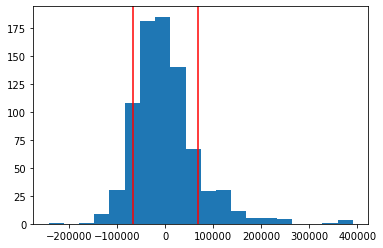

In [83]:
plt.hist(residuals1, bins=20)
plt.axvline(np.std(residuals1), color = "r")
plt.axvline(np.std(residuals1)*-1, color = "r");

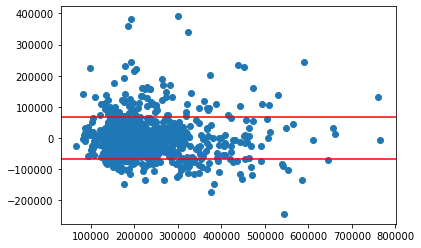

In [84]:
plt.scatter(y_preds,residuals1)
plt.axhline(np.std(residuals1), color = "r")
plt.axhline(np.std(residuals1)*-1, color = "r");

In [85]:
print(f' adj_r2_1 : {1 - (1-metrics.r2_score(y,y_preds1))*(len(y)-1)/(len(y)-3-1)}')
print(f' MSE : {metrics.mean_squared_error(y,y_preds1)}')
print(f' RSME : {metrics.mean_squared_error(y,y_preds1,squared=False)}')
print(f' R^2 : {metrics.r2_score(y,y_preds1)}')

 adj_r2_1 : 0.6791920194665693
 MSE : 4573665320.70542
 RSME : 67628.87933941698
 R^2 : 0.6803816658715139


Model 1 has R^2 : 0.675 
Model 2 has R^2 : 0.680 
I decide select Model 2 to predict price of sacramento_real_estate_transactions 

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

My model is high variance because more feature to predict a price.